In [1]:
import numpy as np
import torch as pt
import matplotlib.pyplot as plt
import sys

In [2]:
%load_ext autoreload
%autoreload 1
%aimport tfim_hamiltonian_open_fermion
sys.path.append('..\src')
from tfim_hamiltonian_open_fermion import TfimHamiltonianOpenFermion
%reload_ext autoreload

In [3]:
def calculate_energy_gap(qubit_numbers: np.array):
    ratios_h_j = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100], dtype=float)
    energy_gaps = pt.zeros(13)
    for j in range(0, np.size(qubit_numbers)):
        for i in range(0, 13):
            energy_gaps[i] = TfimHamiltonianOpenFermion(qubit_numbers[j], ratios_h_j[i], 1, 'periodic').energygap()
        save_direc: str = 'data\energygap\e_gap_qubit_num_' + str(qubit_numbers[j])
        np.savetxt(save_direc, energy_gaps)

In [4]:

def plot_energy_gap(qubit_numbers: np.array):
    ratios_h_j = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100], dtype=float)
    for i in range(0, np.size(qubit_numbers)):
        save_direc: str = 'data\energygap\e_gap_qubit_num_' + str(qubit_numbers[i])
        energy_gaps = np.abs(np.loadtxt(save_direc))
        plt.scatter(ratios_h_j, energy_gaps, label='qubit number ' + str(qubit_numbers[i]))
        plt.xscale('log')
        plt.yscale('log')
        plt.title('energy gaps for different ratios h/J')
        plt.xlabel('ratios h/J (J=1)')
        plt.ylabel('energy gap in units of J')
        plt.legend()
    plot_save_direc = 'plots\energy_gap_brute_force\energy gaps for different ratios up to ratio 100 antiferro for qubits ' + str(
        qubit_numbers)
    plt.savefig(plot_save_direc)

In [5]:
def calculate_theo_energy_gap(qubit_numbers: np.array):
    ratios_h_j = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100], dtype=float)
    energy_gaps = pt.zeros(13)
    for j in range(0, np.size(qubit_numbers)):
        for i in range(0, 13):
            energy_gaps[i] = TfimHamiltonianOpenFermion(qubit_numbers[j], ratios_h_j[i], 1, 'periodic').theoretical_energygap()
        save_direc: str = 'data\energygap\e_gap_theo_qubit_num_' + str(qubit_numbers[j])
        np.savetxt(save_direc, energy_gaps)


In [6]:
def plot_energy_gap_brute_and_theo(qubit_numbers: np.array):
    ratios_h_j = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100], dtype=float)
    for i in range(0, np.size(qubit_numbers)):
        save_direc: str = 'data\energygap\e_gap_qubit_num_' + str(qubit_numbers[i])
        energy_gaps = np.abs(np.loadtxt(save_direc))
        plt.scatter(ratios_h_j, energy_gaps, label='brute, qubit number ' + str(qubit_numbers[i]))
        save_direc: str = 'data\energygap\e_gap_theo_qubit_num_' + str(qubit_numbers[i])
        energy_gaps = np.abs(np.loadtxt(save_direc))
        plt.scatter(ratios_h_j, energy_gaps, label='theo, qubit number ' + str(qubit_numbers[i]))
        plt.xscale('log')
        plt.yscale('log')
        plt.title('energy gaps for different ratios h/J')
        plt.xlabel('ratios h/J (J=1)')
        plt.ylabel('energy gap in units of J')
        plt.legend()
    plot_save_direc = 'plots\energy_gap_brute_force\energy gaps comparison theo and brute for qubits ' + str(
        qubit_numbers)
    plt.savefig(plot_save_direc)



In [7]:
def calculate_theo_finite_size_energy_gap(qubit_numbers: np.array):
    ratios_h_j = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100], dtype=float)
    energy_gaps = pt.zeros(13)
    for j in range(0, np.size(qubit_numbers)):
        for i in range(0, 13):
            energy_gaps[i] = TfimHamiltonianOpenFermion(qubit_numbers[j], ratios_h_j[i], 1, 'periodic').theo_energygap_finite_size()
        save_direc: str = 'data\energygap\e_gap_theo_finite_size_qubit_num_' + str(qubit_numbers[j])
        np.savetxt(save_direc, energy_gaps)

In [8]:
def plot_energy_gap_brute_and_theo_finite(qubit_numbers: np.array):
    ratios_h_j = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100], dtype=float)
    for i in range(0, np.size(qubit_numbers)):
        save_direc: str = 'data\energygap\e_gap_qubit_num_' + str(qubit_numbers[i])
        energy_gaps = np.abs(np.loadtxt(save_direc))
        plt.scatter(ratios_h_j, energy_gaps, label='brute, qubit number ' + str(qubit_numbers[i]))
        save_direc: str = 'data\energygap\e_gap_theo_finite_size_qubit_num_' + str(qubit_numbers[i])
        energy_gaps = np.abs(np.loadtxt(save_direc))
        plt.scatter(ratios_h_j, energy_gaps, label='theo finite size, qubit number ' + str(qubit_numbers[i]))
        plt.xscale('log')
        plt.yscale('log')
        plt.title('energy gaps for different ratios h/J')
        plt.xlabel('ratios h/J (J=1)')
        plt.ylabel('energy gap in units of J')
        plt.legend()
    plot_save_direc = 'plots\energy_gap_brute_force\energy gaps comparison theo finite and brute for qubits ' + str(
        qubit_numbers)
    plt.savefig(plot_save_direc)

In [9]:
def calculate_theo_finite_size_energy_gap_periodic(qubit_numbers: np.array):
    ratios_h_j = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100], dtype=float)
    energy_gaps = pt.zeros(13)
    for j in range(0, np.size(qubit_numbers)):
        for i in range(0, 13):
            energy_gaps[i] = TfimHamiltonianOpenFermion(qubit_numbers[j], ratios_h_j[i], 1, 'periodic').theo_energygap_finite_size()
        save_direc: str = 'data\energygap\e_gap_theo_finite_size_periodic_qubit_num_' + str(qubit_numbers[j])
        np.savetxt(save_direc, energy_gaps)


In [10]:
def plot_energy_gap_brute_and_theo_finite_periodic(qubit_numbers: np.array):
    ratios_h_j = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100], dtype=float)
    for i in range(0, np.size(qubit_numbers)):
        save_direc: str = 'data\energygap\e_gap_qubit_num_' + str(qubit_numbers[i])
        energy_gaps = np.abs(np.loadtxt(save_direc))
        plt.scatter(ratios_h_j, energy_gaps, label='brute, qubit number ' + str(qubit_numbers[i]))
        save_direc: str = 'data\energygap\e_gap_theo_finite_size_periodic_qubit_num_' + str(qubit_numbers[i])
        energy_gaps = np.abs(np.loadtxt(save_direc))
        plt.scatter(ratios_h_j, energy_gaps, label='theo finite size, qubit number ' + str(qubit_numbers[i]))
        plt.xscale('log')
        plt.yscale('log')
        plt.title('energy gaps for different ratios h/J')
        plt.xlabel('ratios h/J (J=1)')
        plt.ylabel('energy gap in units of J')
        plt.legend()
    plot_save_direc = 'plots\energy_gap_brute_force\energy gaps comparison theo finite periodic and brute for qubits ' + str(
        qubit_numbers)
    plt.savefig(plot_save_direc)

In [11]:
calculate_energy_gap([12])
calculate_theo_finite_size_energy_gap_periodic([12])

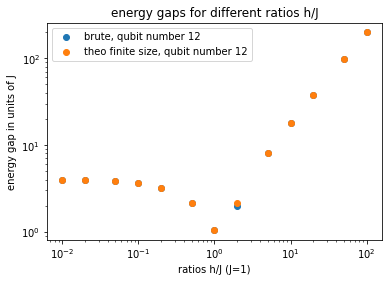

In [12]:
plot_energy_gap_brute_and_theo_finite_periodic([12])